# Data Analysis of the data excluding WV to observe the effect after omitting an outlier

In [14]:
import pandas as pd 

In [15]:
df = pd.read_excel('/Users/snehajoshi/Desktop/new_final_data.xlsx')

df

In [16]:
df = df[df['State'] != 'West Virginia']

In [17]:
import numpy as np
import scipy.stats as stats

x = df['Unemployment by state per year']
y = df['Graduation rate']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the regression values
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Standard Error: {std_err:.6f}")

Slope: -0.000875
Intercept: 97.750643
R-squared: 0.013243
P-value: 0.029026
Standard Error: 0.000399


The above program shows the relationship between graduation rate and unemployed people per state throughout the years except West Virginia. It shows that they have a negative relationship where the graduation rate is expected to decrease by approximately 0.000875% when the unemployed person per state increases by 1 person. With R-squared being 0.013243, we can say that 1.3% of the variation in graduation rate is explained by the variable unemployed people per state. With the p-value being 0.029026, which is less than 0.05, we can say that this relationship shown by the regression is statistically significant.

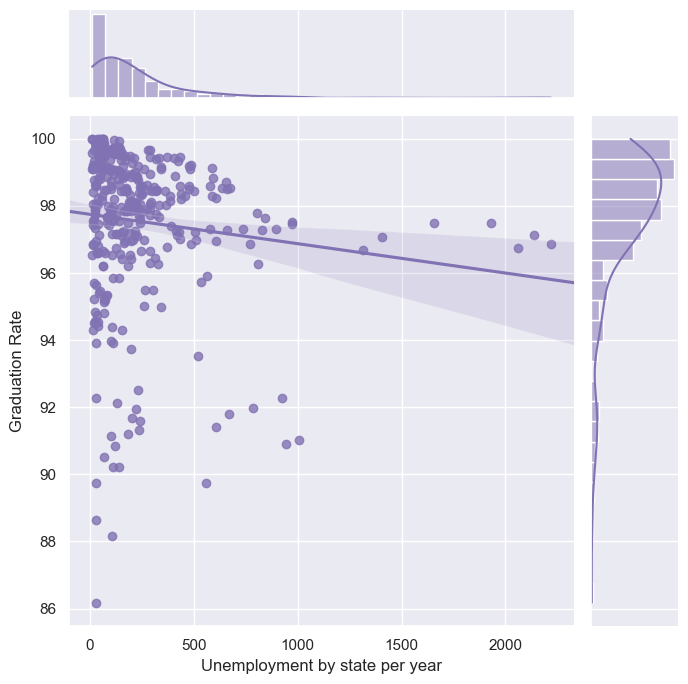

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=x, y=y, kind="reg", truncate=False, color="m", height=7)

# Customize the labels for x and y axes
g.set_axis_labels("Unemployment by state per year", "Graduation Rate")

# Show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

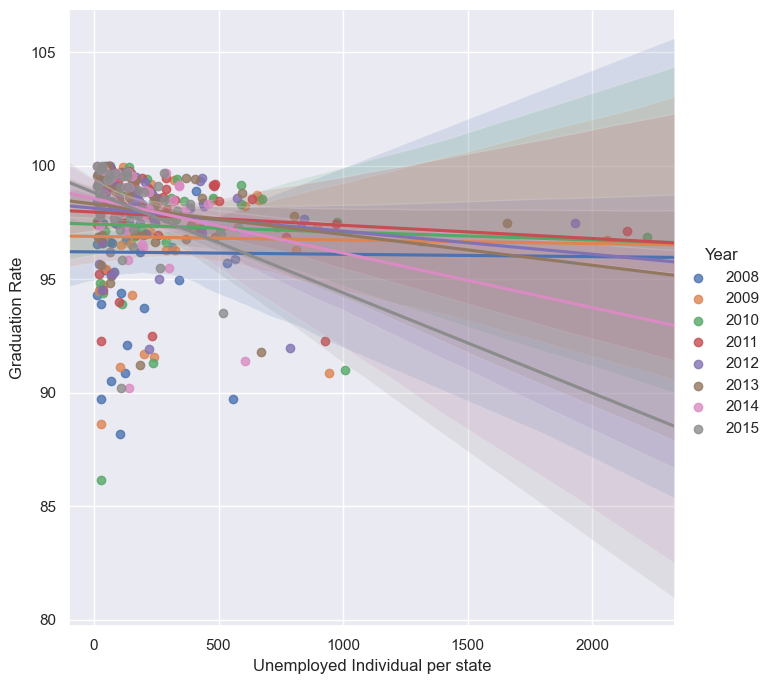

In [19]:
x = df['Unemployment by state per year']
y = df['Graduation rate']
year = df['Year'] 

# Create a Seaborn scatter plot with a regression line
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.lmplot(data=df, x='Unemployment by state per year', y='Graduation rate', hue='Year', height=7, truncate=False)

# Customize the labels for x and y axes
plt.xlabel("Unemployed Individual per state")
plt.ylabel("Graduation Rate")

# Show the plot
plt.show()

In [20]:
x1 = df['Patents awarded']
y1 = df['Graduation rate']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)

# Print the regression values
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Standard Error: {std_err:.6f}")

Slope: 0.059267
Intercept: 96.614916
R-squared: 0.057851
P-value: 0.000004
Standard Error: 0.012641


The program above performs a linear regression between Patents Awarded and Graduation Rate excluding the outlier for West Virginia. This shows that there is a positive relationship between patents awarded to individuals where an increase of one thousand patents awarded in Science and Engineering per state approximately increases the graduation rate by 0.059267%.With R-squared being 0.057851, we can say that 5.7% of the variation in graduation rate is explained by the variable patents awarded per state in Science and Engineering occupations. With the p-value being 0.000004, which is much less than 0.05, we can say that this relationship shown by the regression is statistically significant.

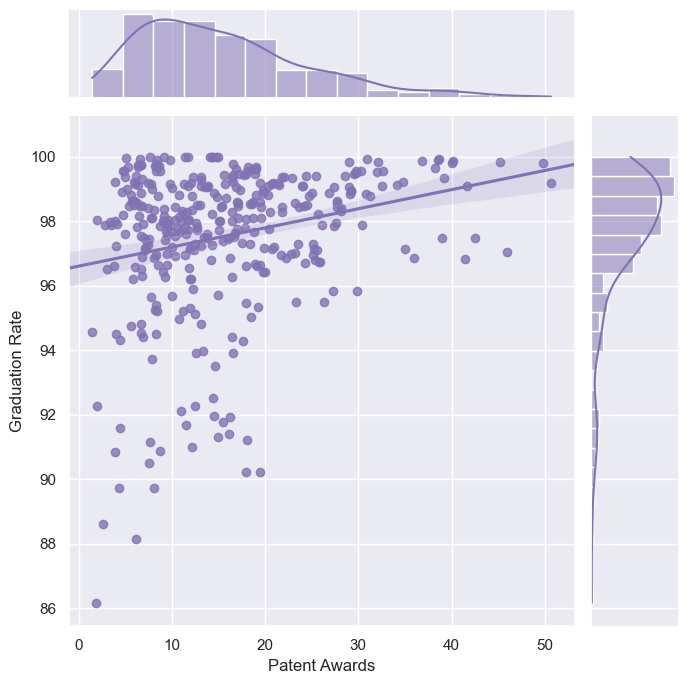

In [21]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=x1, y=y1, kind="reg", truncate=False, color="m", height=7)

# Customize the labels for x and y axes
g.set_axis_labels("Patent Awards", "Graduation Rate")

# Show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

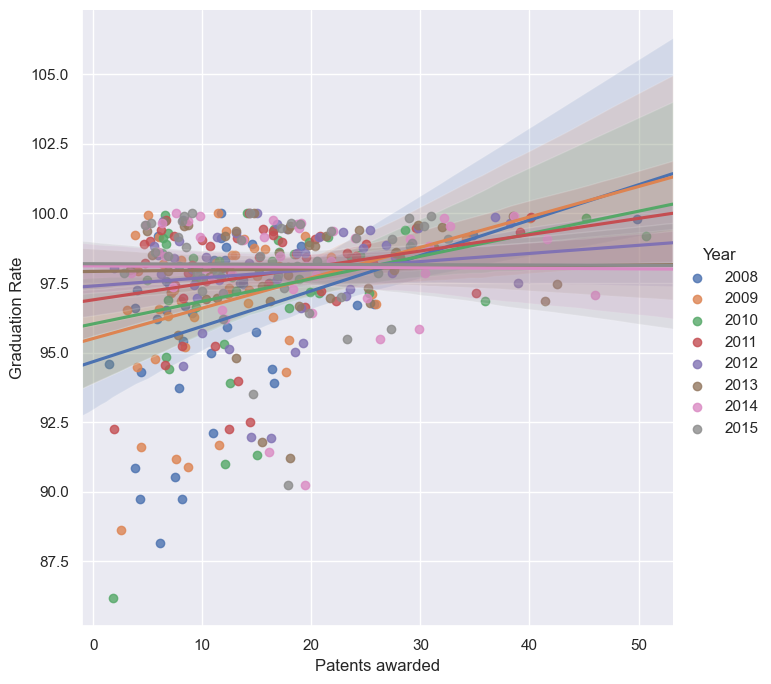

In [22]:
year = df['Year'] 

# Create a Seaborn scatter plot with a regression line
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.lmplot(data=df, x='Patents awarded', y='Graduation rate', hue='Year', height=7, truncate=False)

# Customize the labels for x and y axes
plt.xlabel("Patents awarded")
plt.ylabel("Graduation Rate")

# Show the plot
plt.show()

In [23]:
x3 = df['R&D Obligations/ individuals S/E']
y3 = df['Graduation rate']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x3, y3)

# Print the regression values
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.6f}")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Standard Error: {std_err:.6f}")

Slope: -0.000007
Intercept: 97.684581
R-squared: 0.003850
P-value: 0.240261
Standard Error: 0.000006


The program above performs a linear regression between Research and Development Obligations per individuals in Science and Engineering Occupations and Graduation Rate. This shows that there is a negative relationship between patents awarded to individuals where an increase of one dollar of Research and Development Obligation per individual worker in Science and Engineering per state approximately decreases the graduation rate by 0.000007%. With R-squared being 0.003850, we can say that 0.38% of the variation in graduation rate is explained by the variable Research and Development Obligation per individual worker in Science and Engineering per state. With the p-value being 0.240261, which is greater than 0.05, we can say that this relationship shown by the regression is statistically significant.

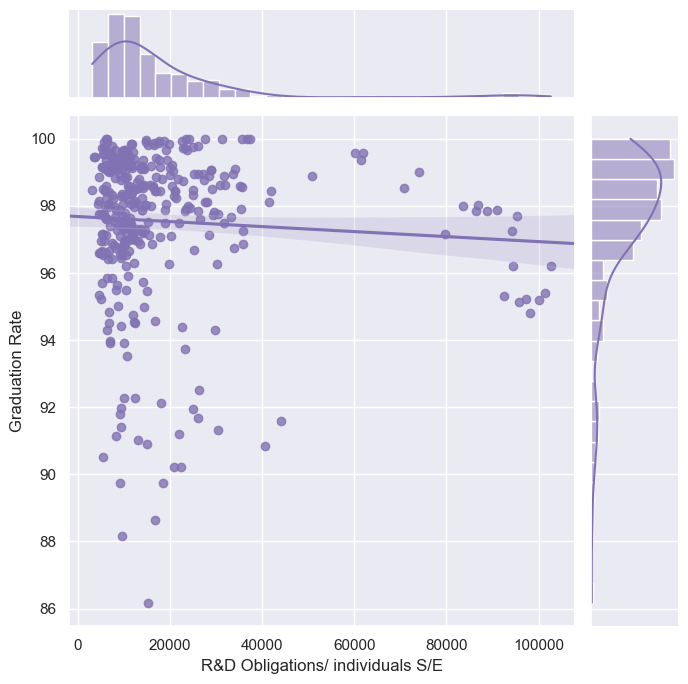

In [24]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=x3, y=y3, kind="reg", truncate=False, color="m", height=7)

# Customize the labels for x and y axes
g.set_axis_labels("R&D Obligations/ individuals S/E", "Graduation Rate")

# Show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

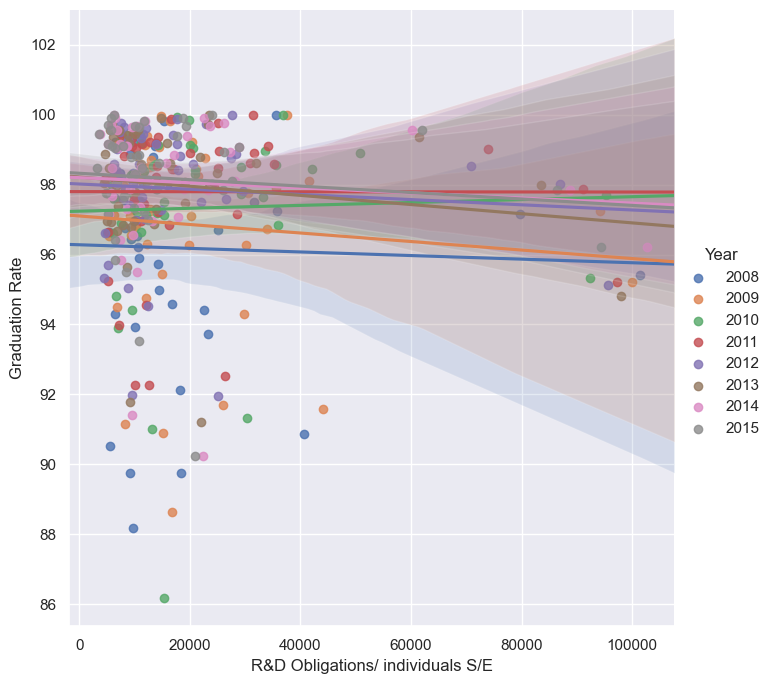

In [25]:
year = df['Year'] 

# Create a Seaborn scatter plot with a regression line
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.lmplot(data=df, x='R&D Obligations/ individuals S/E', y='Graduation rate', hue='Year', height=7, truncate=False)

# Customize the labels for x and y axes
plt.xlabel("R&D Obligations/ individuals S/E")
plt.ylabel("Graduation Rate")

# Show the plot
plt.show()

In [26]:
import statsmodels.api as sm
X = df[['R&D Obligations/ individuals S/E', 'Patents awarded', 'Unemployment by state per year'] ] # List all independent variables
X = sm.add_constant(X)  # Add an intercept (constant) term
y = df['Graduation rate'] #dependent variable
model = sm.OLS(y, X).fit()
print(model.summary())
coefficients = model.params
std_errors = model.bse
p_values = model.pvalues
r_squared = model.rsquared

                            OLS Regression Results                            
Dep. Variable:        Graduation rate   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     12.13
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.41e-07
Time:                        11:15:23   Log-Likelihood:                -794.26
No. Observations:                 360   AIC:                             1597.
Df Residuals:                     356   BIC:                             1612.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

The above program does a multilinear regression. Here we are looking at the relationship each variable has with the graduation rates by controlling for other variables after omitting West Virginia as it was an outlier. We can see that among the variables, federal funding is not statistically significant when relating to the effect it has on graduation rates. An increase of patents awarded per 1000 people in S&E approximately increases the graduation rate by 0.0708%. An increase of unemployed people per state by 1 person, the graduation rate is assumed to decrease by 0.0014%. Both of these values for relationship have a statistical significant value.